#### Gradient Descent o Descenso del Gradiente

In [2]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

Vamos a optimizar una función cualquiera con la técnica del Descenso del Gradiente  
La función va a ser: $F(x, y) = \sin(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3)\cos(2x + 1 - e^y)$

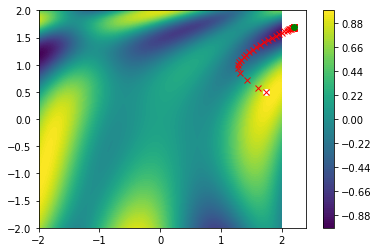

In [48]:
# th = vector de parámetros
func = lambda th: np.sin(1 / 2 * th[0] ** 2 - 1 / 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])
# func([2, 5])

# La función que vamos a optimizar tiene 3 dimensiones, vamos a dibujar dicha función,
# en un plano (2D) pero mostrando las zonas con más profundidad con diferente color.
resolucion = 100
X = np.linspace(-2, 2, resolucion) # 100 coordenadas en X entre -2 y 2
Y = np.linspace(-2, 2, resolucion)

Z = np.zeros((resolucion, resolucion))

# indice, valor
# Z contendrá el dibujo entero una vez pasados todos los valores por la función
for ind_x, x in enumerate(X):
    for ind_y, y in enumerate(Y):
        # primero ind_y por que el primer índice es el número de filas,
        # y el segundo es el número de columnas. Luego primero eje Y y luego eje X
        Z[ind_y, ind_x] = func([x, y])

# plt.contourf es como plt.contour pero la representación es sólida en vez de con anillas
# Primero los datos (ejes), luego el resultado de la función y luego resolucion o número de anillas
plt.contourf(X, Y, Z, 100)
plt.colorbar()

theta = np.random.rand(2) # 2 valores aleatorios del rango [0 - 1]
theta = theta * 4 - 2 # modificamos el rango a [-2 - 2]
# theta = [1.75, 0.5] # Este es bien vistoso

_theta = np.copy(theta)
h = 0.001 # mini incremento del vector theta para calcular luego su derivada y compararlo con el input orignal
gradiente = np.zeros(2) # 2 por que tenemos 2 componentes
lr = 0.001 # ratio de aprendizage (learning rate)

plt.plot(theta[0], theta[1], "o", c="white")

for _ in range(10000):
    for it, th in enumerate(theta):
        # Calculemos las derivadas parciales, normalmente se utilizan librerias de autodiferenciación
        # pero para el tutorial lo haremos con un "método" de aproximación de la derivada parcial. 
        # Consiste en calcular pequeñas diferencias minimas entre el input y el output
        
        _theta = np.copy(theta)
        _theta[it] += h
        
        # derivada parcial del vector (pendiente de theta[0] y luego theta[1])
        gradiente[it] = (func(_theta) - func(theta)) / h
        
    theta = theta - lr * gradiente
    if(_ % 100 == 0):
        plt.plot(theta[0], theta[1], "x", c="red")
        
plt.plot(theta[0], theta[1], "o", c="green")

plt.show()